In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets,layers,models

In [ ]:
(x_train,y_train),(x_test,y_test)=datasets.mnist.load_data()  

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape     # we have 60k images 28 by 28 pixel

(60000, 28, 28)

In [ ]:
x_train[0]    # its a 2-d array

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

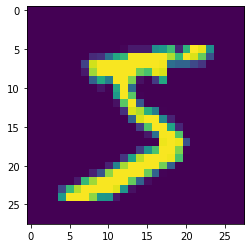

In [ ]:
plt.imshow(x_train[0])

In [ ]:
y_train[0]    # we can see in train dataset in position 0 we have 5

5

In [ ]:
# We are going to flatten our dataset i,e convert the 2-d array to 1-d

In [ ]:
x_train=x_train.reshape(-1,28*28)
x_test=x_test.reshape(-1,28*28)

In [ ]:
x_train_flattened.shape

(60000, 784)

In [ ]:
# scaling the data
x_train=x_train/255
x_test=x_test/255

In [ ]:
# Now we construct the neural network

In [ ]:
# sequencial means i have stack of layers in my neural network
model=keras.Sequential([
                  layers.Dense(10,input_shape=(784,),activation='sigmoid')  # dense means all the neurons in one layer are connected with every other neurons in 2nd layer
                                                                           # output shape is 10 (input have 784 neurons and ouput have 10 neurons)
                  
])   # this is how we define our neural network

# after defining we need to compile it
model.compile(optimizer='adam'  ,                # optimizer allow u to train efficiently when backward propagation is going on
              loss='sparse_categorical_crossentropy',    # this means our output class is categorical (0-9 categories) and sparse means our output variable is an integer number
                                                        # if we have one hot encoding we would use categorical_crossentropy only
              metrics=['accuracy']    
)
# fit is where the training happens
model.fit(x_train_flattened,y_train,epochs=5)      #epochs is the no of iterations for which your neural network is going to run

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4697 - accuracy: 0.8763
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3037 - accuracy: 0.9150
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2835 - accuracy: 0.9211
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2730 - accuracy: 0.9239
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2663 - accuracy: 0.9261


In [ ]:
# Now lets evaluate the accuracy on test dataset
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2773 - accuracy: 0.9220


[0.2772899568080902, 0.921999990940094]

In [ ]:
# Models looks good its a simple neural network

In [ ]:
# lets take sample  prediction

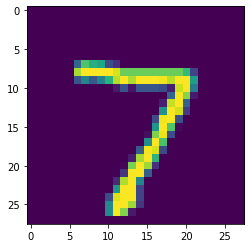

In [ ]:
plt.imshow(x_test[0])

In [ ]:
y_predict=model.predict(x_test_flattened)
y_predict[0]

# here we get 10 values coz we have scores of all 0 to 9 and we consider the max score and see whose score is that that is the predicted value

array([2.9166788e-02, 3.0138128e-07, 3.1736642e-02, 9.6225870e-01,
       2.1890998e-03, 9.3523771e-02, 1.6436768e-06, 9.9983609e-01,
       1.0708666e-01, 6.5512168e-01], dtype=float32)

In [ ]:
np.argmax(y_predict[0])    # this finds the max value and print the index of that value

# so prdicting value is 7 and it is prdicting okay

7

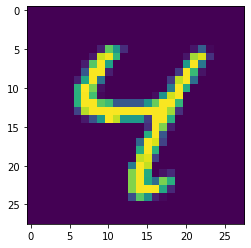

In [ ]:
plt.imshow(x_test[6])

In [ ]:
y_predict[6]

array([7.6127052e-04, 4.9733084e-05, 1.5500188e-04, 4.3994606e-02,
       9.9620581e-01, 4.6530932e-01, 1.9122928e-02, 2.4991637e-01,
       7.8975403e-01, 6.7501473e-01], dtype=float32)

In [ ]:
np.argmax(y_predict[6])

4

In [ ]:
# building a confusion matrix
# y_prdict are whole values and y_test are integer values so first we need to change that

In [ ]:
y_predict_labels=[np.argmax(i) for i in y_predict]
y_predict_labels[:5]

[7, 2, 1, 0, 4]

In [ ]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predict_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    0,    1,    0,    4,    7,    3,    1,    0],
       [   0, 1110,    2,    2,    0,    1,    4,    2,   14,    0],
       [  11,    9,  877,   35,   11,    3,   14,   14,   56,    2],
       [   3,    0,    9,  934,    0,   19,    3,   12,   25,    5],
       [   2,    1,    2,    1,  917,    0,   12,    5,   11,   31],
       [  11,    2,    2,   40,    8,  752,   19,   10,   41,    7],
       [  12,    3,    3,    1,    7,    7,  920,    2,    3,    0],
       [   2,    5,   16,   12,    4,    0,    0,  964,    5,   20],
       [   6,    7,    5,   22,    8,   16,   11,   12,  883,    4],
       [  11,    7,    1,   13,   27,    5,    0,   35,   11,  899]],
      dtype=int32)>

Text(69.0, 0.5, 'Actual')

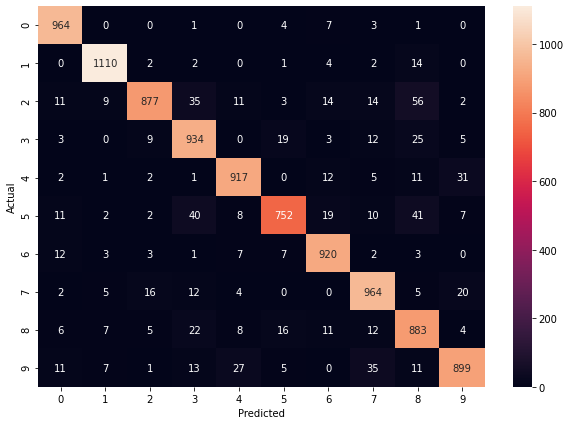

In [ ]:
# lets visualise this
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [ ]:
# this confusion matrix is telling me that 963 times the label was 0 and the model predicted it to be zero
# 1106 times matrix says 1 and predicted is 1
# the nos other than diagonals are errors

In [ ]:
# now lets ass hidden layers to this model hidden layers improve the performance of the model

In [ ]:
model2=keras.Sequential([
                  layers.Dense(100,input_shape=(784,),activation='relu'),
                  layers.Dense(10,activation='sigmoid')  
                  
])   # this is how we define our neural network

# after defining we need to compile it
model2.compile(optimizer='adam'  ,                
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']    
)
# fit is where the training happens
model2.fit(x_train_flattened,y_train,epochs=5)      #epochs is the no of iterations for which your neural network is going to run

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2707 - accuracy: 0.9238
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1262 - accuracy: 0.9627
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0887 - accuracy: 0.9734
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0662 - accuracy: 0.9800
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0538 - accuracy: 0.9842


In [ ]:
model2.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0836 - accuracy: 0.9748


[0.08359350264072418, 0.9747999906539917]

In [ ]:
# we can see the accuracy is improved using the hidden layer

Text(69.0, 0.5, 'Actual')

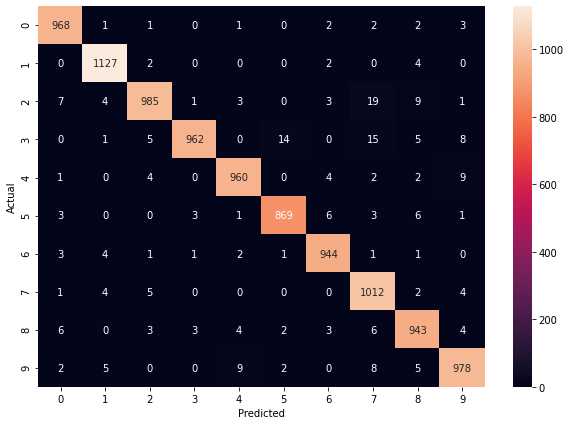

In [ ]:
# lets visualise this
y_predict1=model2.predict(x_test_flattened)
y_predict_labels1=[np.argmax(i) for i in y_predict1]
cm1=tf.math.confusion_matrix(labels=y_test,predictions=y_predict_labels1)


plt.figure(figsize=(10,7))
sn.heatmap(cm1,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [ ]:
# keras have a function to flattened the layers itself rather than doing yourself

In [ ]:
model3=keras.Sequential([
                  layers.Flatten(input_shape=(28,28)),
                  layers.Dense(100,activation='relu'),
                  layers.Dense(10,activation='sigmoid')  
                  
])   # this is how we define our neural network

# after defining we need to compile it
model3.compile(optimizer='adam'  ,                
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']    
)
# fit is where the training happens
model3.fit(x_train,y_train,epochs=5)      #epochs is the no of iterations for which your neural network is going to run

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 2.0402 - accuracy: 0.8367
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3745 - accuracy: 0.9063
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2806 - accuracy: 0.9262
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2450 - accuracy: 0.9352
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2240 - accuracy: 0.9400


**Hypertuning**

In [ ]:
def build_model(dropout_rate,h_layers):
  modeel=keras.Sequential()     # coz we need to add all the layers in sequence
  for i,neurons in enumerate(h_layers):
    if i==1:
      modeel.add(layers.Flatten(input_shape=(28,28)))
      modeel.add(layers.Dense(neurons,activation='relu'))
      modeel.add(layers.Dropout(dropout_rate))      
    else:
     modeel.add(layers.Dense(neurons,activation='relu'))
     modeel.add(layers.Dropout(dropout_rate))      
  
  modeel.add(layers.Dense(10,activation='sigmoid'))
  modeel.compile(optimizer='Adam',                
              #loss='sparse_categorical_crossentropy',  
              loss=tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=False, reduction="auto", name="sparse_categorical_crossentropy"
                )    ,        
              metrics=['accuracy'] )
  return modeel 
      
      
  

In [ ]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

moodel=KerasClassifier(build_fn=build_model,verbose=1)

dropout_rate=[0.1,0.2,0.3,0.4,0.6]
h_layers=[[40],[40,20],[40,30,15]]
epochs=[5,10,50]


paramgrid=dict(h_layers=h_layers,dropout_rate=dropout_rate,epochs=epochs)

grid=GridSearchCV(estimator=moodel,param_grid=paramgrid,cv=3)



In [ ]:
grid_result=grid.fit(x_train,y_train)

Streaming output truncated to the last 5000 lines.
Epoch 46/50
1250/1250 [==============================] - 3s 2ms/step - loss: 0.0735 - accuracy: 0.9783
Epoch 47/50
1250/1250 [==============================] - 3s 2ms/step - loss: 0.0784 - accuracy: 0.9769
Epoch 48/50
1250/1250 [==============================] - 3s 2ms/step - loss: 0.0750 - accuracy: 0.9780
Epoch 49/50
1250/1250 [==============================] - 3s 3ms/step - loss: 0.0760 - accuracy: 0.9775
Epoch 50/50
625/625 [==============================] - 1s 1ms/step - loss: 0.1593 - accuracy: 0.9647
Epoch 1/50
1250/1250 [==============================] - 4s 2ms/step - loss: 0.6388 - accuracy: 0.8060
Epoch 2/50
1250/1250 [==============================] - 3s 2ms/step - loss: 0.3225 - accuracy: 0.9061
Epoch 3/50
1250/1250 [==============================] - 3s 3ms/step - loss: 0.2600 - accuracy: 0.9251
Epoch 4/50
1250/1250 [==============================] - 3s 2ms/step - loss: 0.2229 - accuracy: 0.9349
Epoch 5/50
1250/1250 [======

In [ ]:
# summarise result
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))